### H3.1

**Binary Classification**

$$ E^T = \frac{1}{p} \sum_{\alpha=1}^pe^{(\alpha)} $$

**where**
$$ e^{(\alpha)} = - [ y^{(\alpha)}\ln \hat{y} + (1-y^{(\alpha)}) \ln(1-\hat{y}) ]$$ 

**a)**
Show that
$$\frac{\partial e^{(\alpha)} }{ \partial \hat{y} } = \frac{\hat{y} - y}{\hat{y}(1-\hat{y})}$$

\begin{align*}
    \frac{\partial e^{(\alpha)} }{ \partial \hat{y} } &= - \Bigg( \frac{y}{\hat{y}} + \frac{(y-1)}{1-\hat{y}} \Bigg )\\
    &= -  \frac{y-y\hat{y} + y\hat{y} - \hat{y}}{\hat{y}(1-\hat{y})}\\
    &=-  \frac{y - \hat{y}}{\hat{y}(1-\hat{y})} \\
    &= \frac{\hat{y} - y}{\hat{y}(1-\hat{y})}
\end{align*}

**b)** First denote $x = h_1^2$ and
$$f(x) = \frac{1}{1+e^{-x}}$$
Show that $$
f'(x) = f(x)(1-f(x))
$$

\begin{align*}
f'(x) &= \frac{-1}{1+e^{-x}} ( -e^{-x} ) \\
&= \frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}}\\
&= f(x) \Bigg ( \frac{1+e^{-x}}{1+e^{-x}} - \frac{1}{1+e^{-x}} \Bigg ) \\
&= f(x) ( 1 - f(x) )
\end{align*}

**c)** Find that
$$
\frac{\partial e^{(\alpha)}}{\partial w_{1j}^{21}} = (\hat{y} - y^{(\alpha)})S_j^1
$$
where $S_j^1$ is the activity of neuron $j$ of the hidden layer $(v=1)$
\begin{align*}
\frac{\partial e^{(\alpha)}}{\partial w_{1j}^{21}} &= \frac{ \partial e^{(\alpha)}}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial  w_{1j}^{21}} \\
&= \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} \Bigg( f'(h_1^2) \frac{\partial h_1^2}{\partial w_{1j}^{21}} \Bigg)  \\
&= \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} \Bigg( f(h_1^2)(1- f(h_1^2)) \frac{\partial h_1^2}{\partial w_{1j}^{21}} \Bigg) \\
&= \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} \Bigg( \hat{y}(1- \hat{y}) \frac{\partial}{\partial w_{1j}^{21}} (w_{1j}^{(21)} S_j) \Bigg) \\
&= \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} \Bigg( \hat{y}(1- \hat{y})  S_j \Bigg) \\
&= (\hat{y} - y)S_j 
\end{align*}

### H3.2

In [1]:
import pandas
import matplotlib.pyplot as plt
from math import *

import numpy as np

0    0.5503
1    0.9206
2    0.5359
3    0.6081
4    0.0202
5    0.8545
6    0.2357
7    0.4847
8    0.3996
9    0.1957
Name: X, dtype: float64
0   -0.5894
1   -0.2507
2   -0.0468
3   -0.3402
4    0.2857
5   -1.0683
6    0.8605
7   -0.0801
8    0.6837
9    1.1850
Name: y, dtype: float64


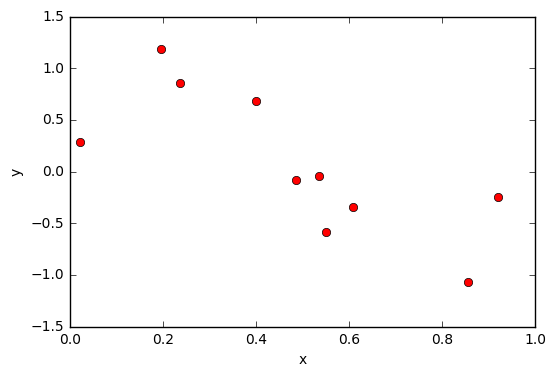

In [2]:
# Load data from csv file
file = "RegressionData.txt"
df = pandas.read_csv(file, sep=" ", header=None, names=["X", "y"])
# df = df.sort_values(by="X")

raw_X = df.X
Y = df.y.values.reshape(len(df),1)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(df.X,df.y,'ro')
print(df.X)
print(df.y)


In [3]:
# Initialize Network
LIN_NODES = 1;
L1_NODES = 3;
LOUT_NODES = 1;

def init_weights():
    # np.random.seed(1)
    W1 = np.random.uniform(-2,2,L1_NODES)
    B1 = np.random.uniform(-2,2,L1_NODES)
    # np.random.seed(1)
    W2= np.random.uniform(-2,2,  L1_NODES)
    B2 = np.random.uniform(-2,2, LOUT_NODES)
    return (W1, W2, B1, B2)

# print("Size Input: "+ str(LIN_NODES) )
# print("No. weigths between Input and L1 "+ str(W1_DEFAULT.shape) )
# print("Size L1: "+ str(L1_NODES) )
# print("No. weigths between L1 and Output "+ str(W2_DEFAULT.shape) )
# print("Size Output: "+ str(LOUT_NODES) )

### Backpropagation formulas

**Weights of Layer 2 ( Output Layer )**
$$
\Delta W_{kj}^{21} = (\hat{y} - y )\delta^{(2)}_kS_j^{(1)}
$$

Because the output activation function is linear, hence

$$\delta^{(2)}_k = 1 $$

$$
\Delta W_{kj}^{21} = (\hat{y} - y )S_j^{(1)}
$$


**Weights of Layer 1 ( Hidden Layer )**
$$
\Delta W_{ji}^{10} = (\hat{y} - y )\delta^{(1)}S_i^{(0)}
$$
where
$$
\delta^{(1)}_j = f'(h^{(1)}_j)\sum_{ (2,k) \in children(1,j) }{ W^{(21)}_{kj}\delta^{(2)}_{k} }
$$
Hence
\begin{align*}
\Delta W_{ji}^{10} &= (\hat{y} - y )S_i^{(0)}f'(h^{(1)}_j)\sum_{ (2,k) \in children(1,j) }{ W^{(21)}_{kj}\delta^{(2)}_{k} }\\
&= (\hat{y} - y )S_i^{(0)}f'(h^{(1)}_j)W^{(21)} \\
&= (\hat{y} - y )Xf'(h^{(1)}_j)W^{(21)}
\end{align*}

Total cost : 0.1427


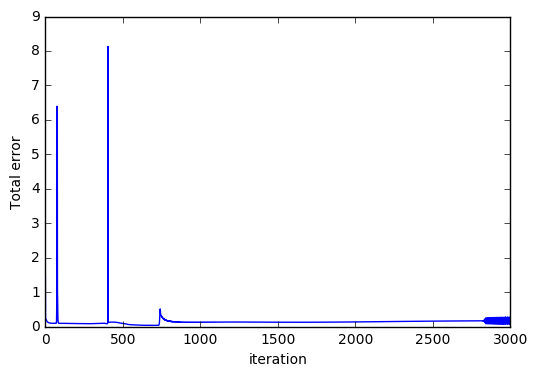

In [4]:
MAX_ITER = 3000
STOP_THRESHOLD = 0.00001

def deriTanh(x):
    return 1 - np.power( np.tanh(x), 2 )

def forward(X, W1, W2, b1, b2):
    H1 = np.zeros((len(X),3))
    S1 = np.zeros((len(X),3))
    pred = np.zeros(len(X))
    
    for i in range(len(X)):
            # Forward
        for j in range(len(W1)):
            H1[i,j] = X[i]*W1[j]
            S1[i,j] = np.tanh(H1[i,j]-b1[j])

        pred[i]= np.dot(S1[i], W2) - b2[0]
#         print(pred[i])
#     print(pred)
#         pred[i]=pred[i].flatten()

    return H1, S1, pred
    
def nn_loop(X,y, W1, W2, b1, b2, eta ):
    itr = 0
    res = []

    y = y.reshape(10)
    
    K_S = []
    
    W1 = np.array(W1)
    W2 = np.array(W2)
    b1 = np.array(b1)
    b2 = np.array(b2)

    while itr < 3000 :
        grad_W1 = np.zeros(W1.shape)
        grad_b1 = np.zeros(b1.shape)
        grad_b2 = np.zeros(b2.shape)
        grad_W2 = np.zeros(W2.shape)
        
        pred = []
        H1, S1, pred = forward(X,W1,W2,b1,b2)

        
        for i in range(len(X)):
#             # Backward
            delta      = pred[i] - y[i]
            bias_w2    = -delta
            grad_b2[0] = grad_b2[0] + bias_w2

            for j in range(3):
                grad_W2[j] = delta*S1[i,j]
#             print(grad_b2)

            for l in range(len(W1)):
                b = -delta*deriTanh(H1[i][l])*W2[l] 
                w =  delta*deriTanh(H1[i][l])*W2[l]*X[i]
                
                grad_b1[l] = grad_b1[l]+b
                grad_W1[l] = grad_W1[l]+w

        quad_cost = np.sum( np.power(pred - y,2)*0.5 ) / len(y)

        grad_W2 = grad_W2 / len(y)
        grad_W1 = grad_W1 / len(y)
        
        grad_b1 = grad_b1 / len(y)
        grad_b2 = grad_b2 / len(y)
    
        W2 = W2 - eta*grad_W2
        W1 = W1 - eta*grad_W1
        b1 = b1 - eta*grad_b1
        b2 = b2 - eta*grad_b2
            
        itr = itr + 1
        res.append({ "err": quad_cost, "prediction": pred, 'dJdW2': 0, 'dJdW1': 0, 'L1_signal': S1, 'weights': [W1,W2,b1,b2] })
    return res

            
(W1,W2,B1,B2) = init_weights()    
result = nn_loop(df.X, Y, W1,W2, B1, B2, 0.5 )
res_df = pandas.DataFrame.from_dict(result);
plt.plot( np.arange(len(res_df)), res_df['err'])
plt.xlabel('iteration')
plt.ylabel('Total error')
print("Total cost : %.4f" %(result[-1]['err']))

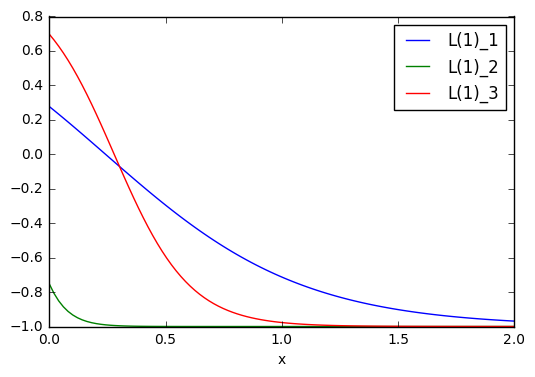

In [5]:
# b)
def plot_activation(res):
    (W1,W2,b1,b2) = res['weights']

    X = np.linspace(0, 2, num=100)

    H1, S1, pred = forward(X,W1,W2,b1,b2)

    S1 = np.matrix(S1)

    plt.xlabel('x')
    plt.plot( X, S1[:,0], label= "L(1)_1" )
    plt.plot( X, S1[:,1], label= "L(1)_2" )
    plt.plot( X, S1[:,2], label= "L(1)_3" )
    plt.legend()
    
plot_activation(result[-1])

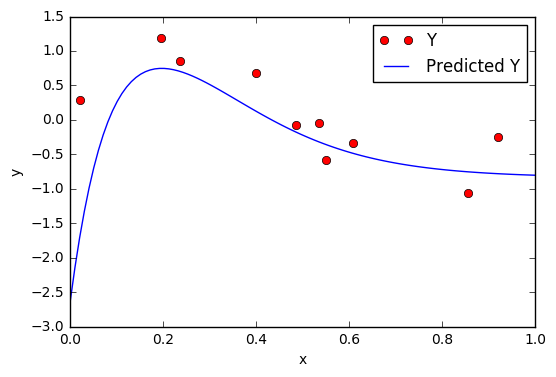

In [6]:
# # c )

def plot_learner(res):
    (W1,W2,b1,b2) = res['weights']

    X = np.linspace(0, 1, num=100)

    H1, S1, y_hat = forward(X,W1,W2,b1,b2)

    plt.xlabel('x')
    plt.ylabel('y')

    plt.plot( df.X, df.y, 'ro', label= "Y",  )
    plt.plot( X, y_hat, 'b-', label= "Predicted Y" )
    plt.legend()


plot_learner(result[-1])


In [7]:
baskets = []
for i in range(2) : 
    ( W1,W2,B1,B2) = init_weights()
    res = nn_loop(df.X, Y, W1,W2, B1, B2, 0.5 )
    baskets.append(res)
print("DONE")

DONE


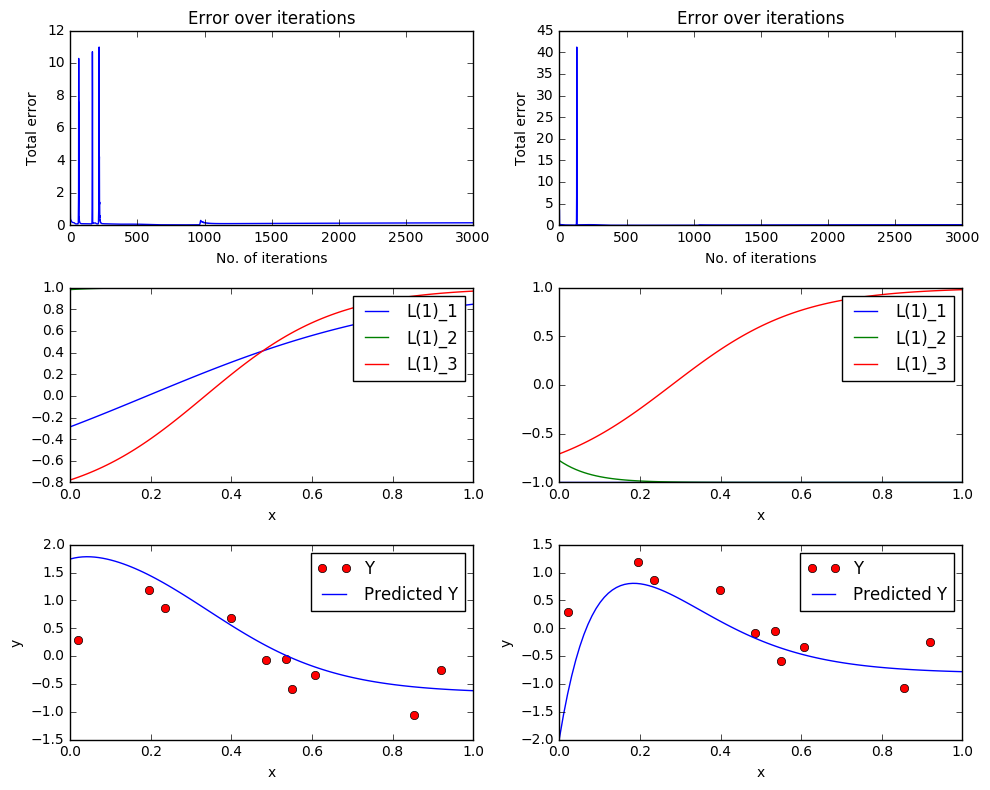

In [8]:
# d)
def compare( res ) :    
    plt.rcParams["figure.figsize"] = [10,8]
    
    X = np.linspace(0, 1, num=100)
               
    for l in range(len(res)):
        r = res[l][-1]

        (W1,W2,b1,b2) = r['weights']
        H1, S1, y_hat = forward(X,W1,W2,b1,b2)

        res_df = pandas.DataFrame.from_dict(res[l]);

        p = plt.subplot(3,2,l+1) 

        p.plot( np.arange(len(res_df)), res_df['err'])
        p.set_title('Error over iterations')
        plt.xlabel('No. of iterations')
        plt.ylabel('Total error')
    

        S1 = np.matrix(S1)
        p = plt.subplot(3,2,l+1+2)
        plt.xlabel('x')
        p.plot( X, S1[:,0], label= "L(1)_1" )
        p.plot( X, S1[:,1], label= "L(1)_2" )
        p.plot( X, S1[:,2], label= "L(1)_3" )
        plt.legend()


        p2 = plt.subplot(3,2,l+1+4) 

        plt.xlabel('x')
        plt.ylabel('y')
        p2.plot( df.X, df.y, 'ro', label= "Y",  )
        p2.plot( X, y_hat, 'b-', label= "Predicted Y" )
        plt.legend()

    plt.tight_layout()

    
compare(baskets)
